<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/dev/templates/knowledge_notebook_minimal_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torsion - Problem Solver

1. This notebook shows solution for calculating angle of twist in a material under torsion.
2. The goal of this notebook is to serve as a general solver for torsion problems and allow to simulate different scenarios varying input parameters like torques, material properties, etc.

In [12]:
# !pip install lxml

In [6]:
# imports
import pandas as pd
import math
import unittest

### Example Problem 1: In the shaft shown in the figure, the cross section is circular with a diameter of 200 mm. The shaft is subjected to torques as shown in the picture. What is the angle of twist from A to C?

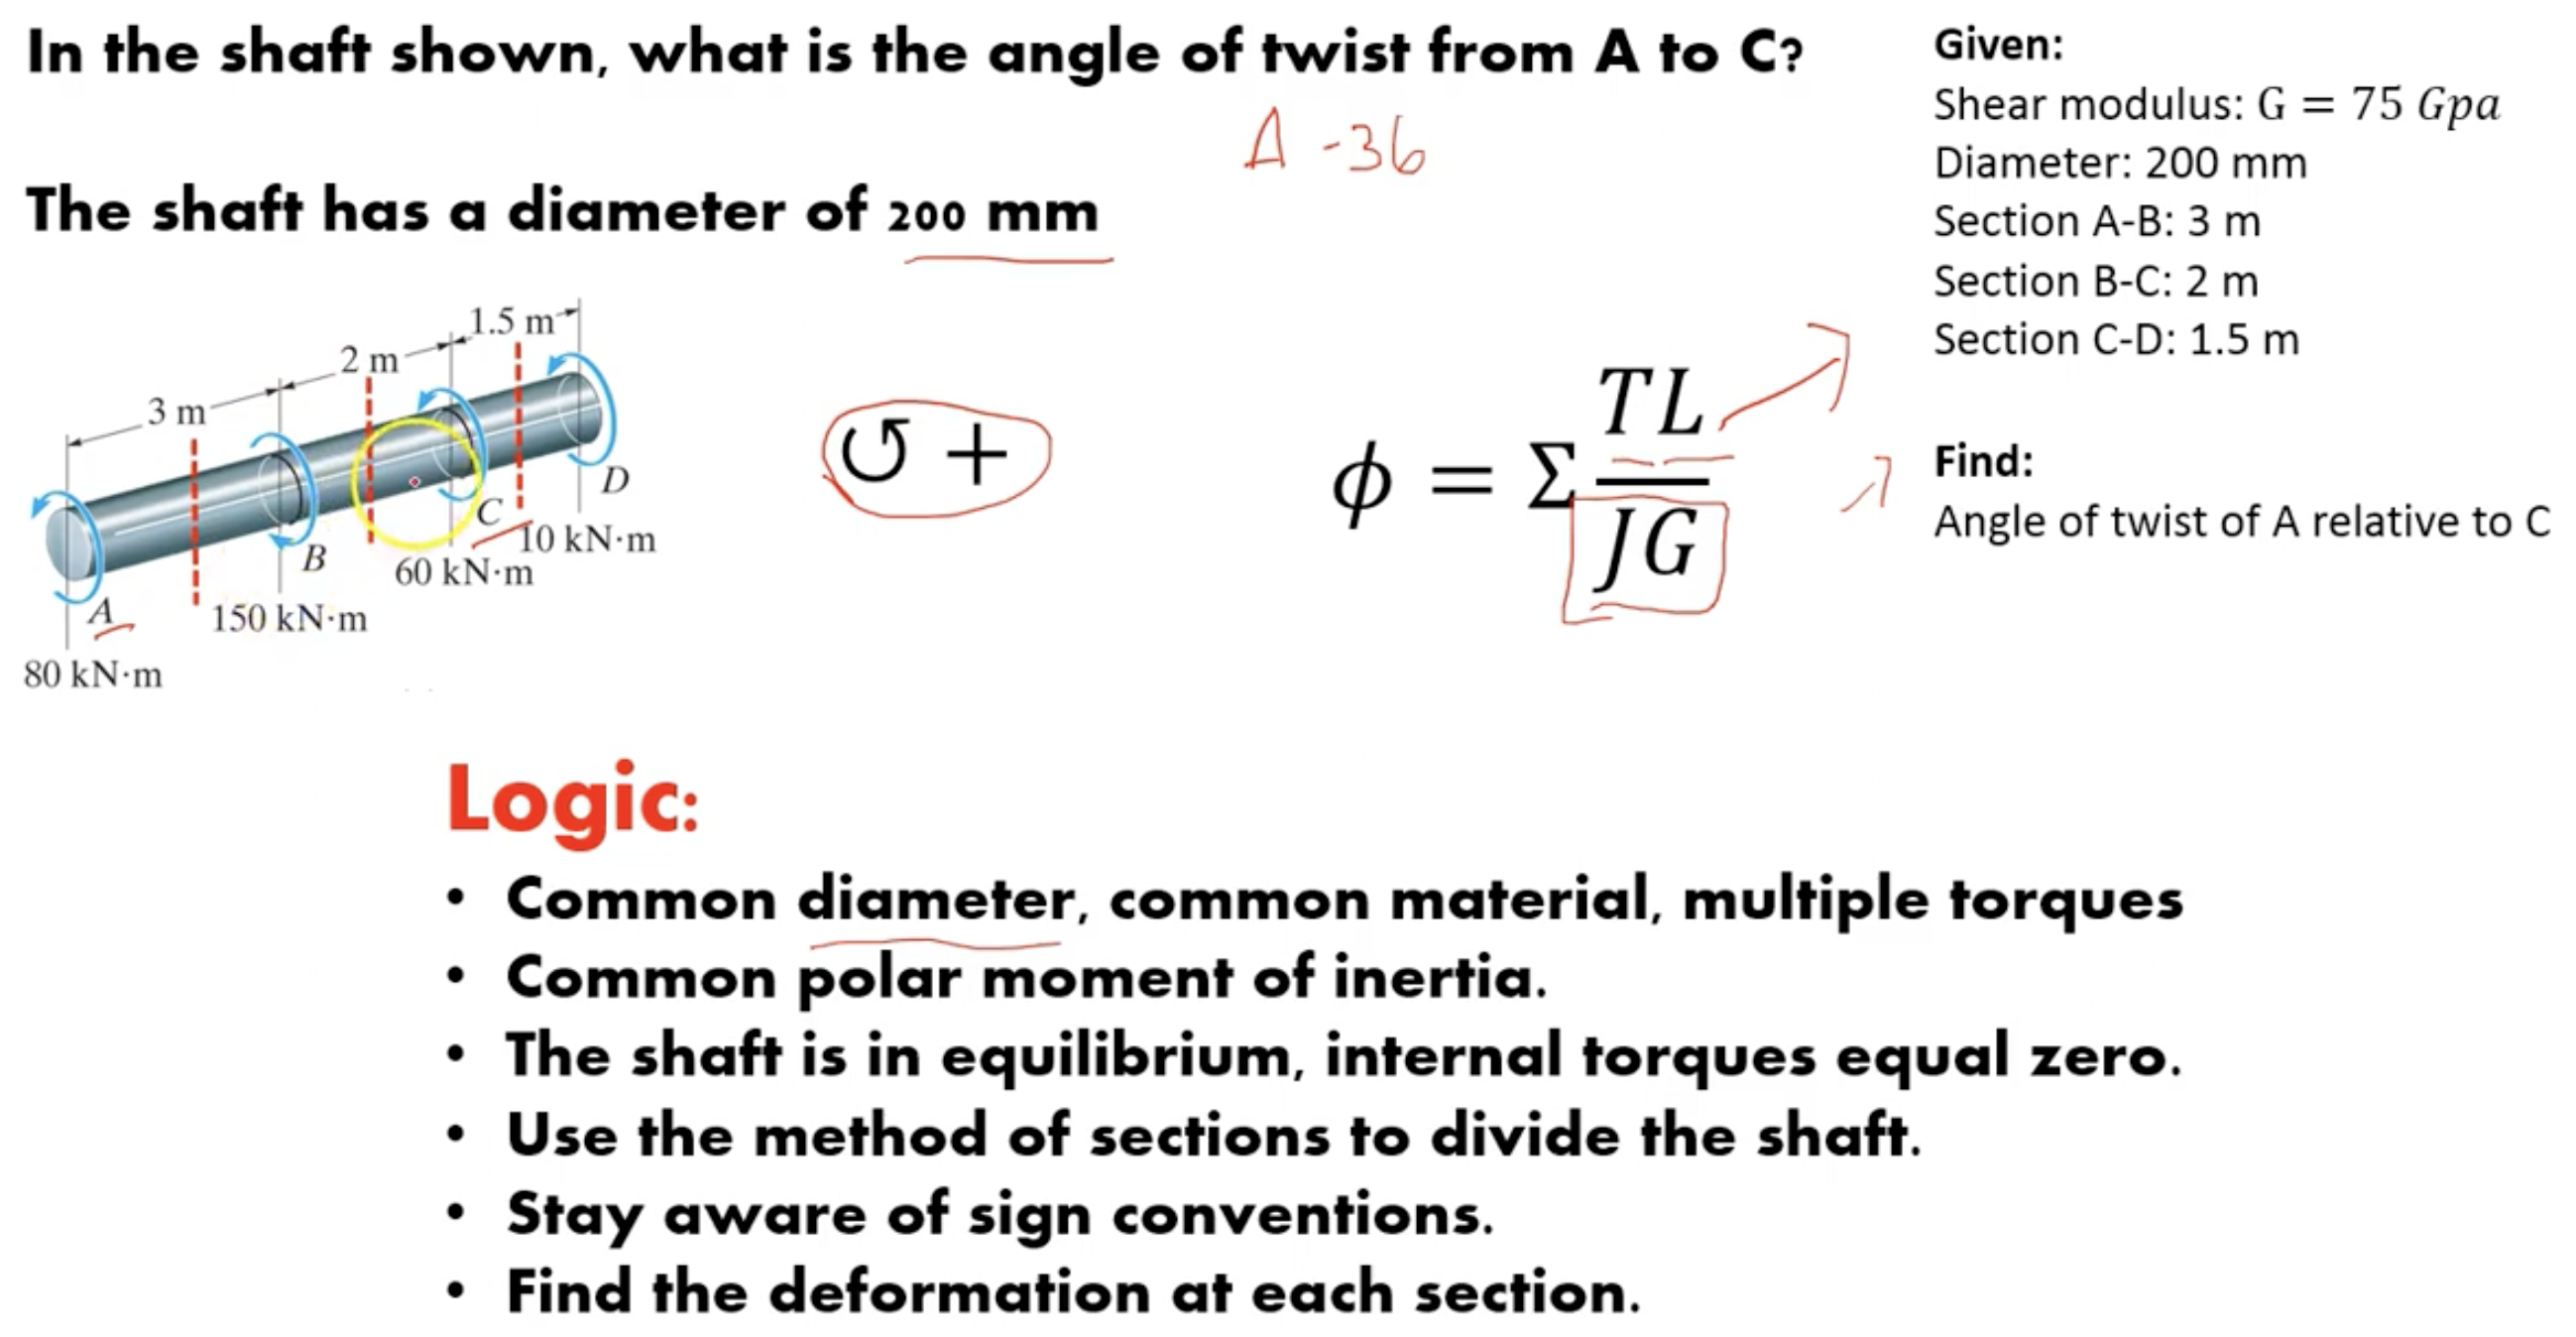

In [2]:
points = ['A', 'B', 'C', 'D']
torques = [80, 150, 60, 10]
directions = ['CCW', 'CW', 'CCW', 'CCW']

# data for sections
lengths = [3, 2, 1.5, 0.5]
diameters = ['0.2', '0.2', '0.2', '0.2']

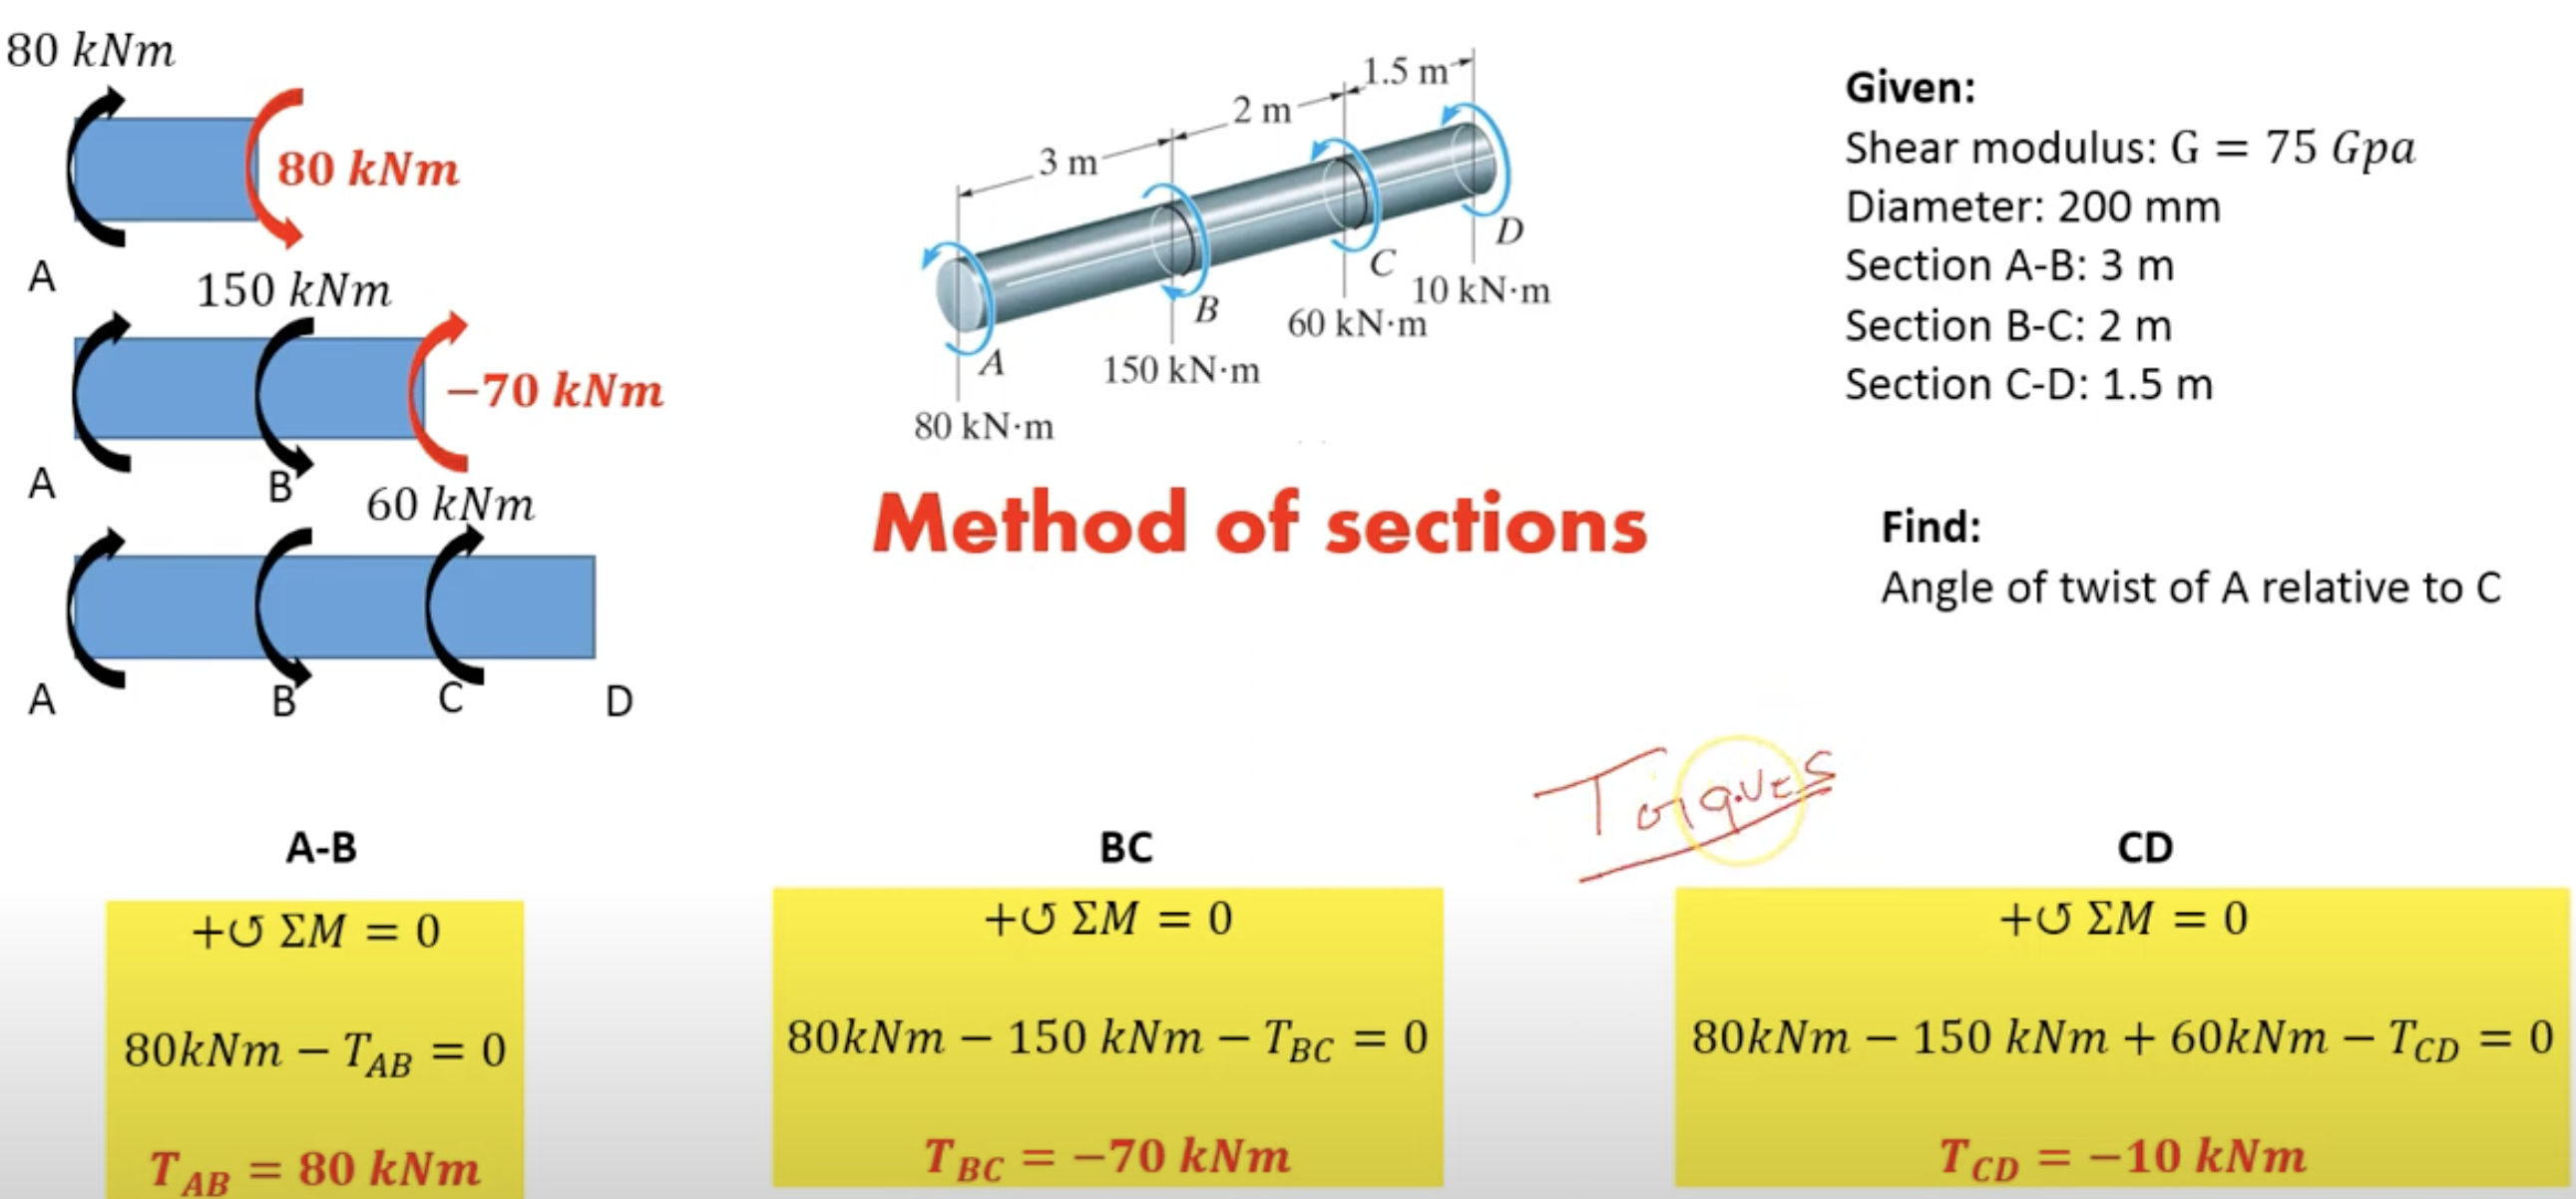

## Method

1. Find:
   * Angle of twist from A to C (A relative to C)

2. Given:
   * Shear modulus: G = 75 Gpa
   * Diameter: 200 mm
   * Section A-B: 3 m
   * Section B-C: 2 m
   * Section C-D: 1.5 m
  
3. Logic (method of approaching the problem, set of rules we can follow):
   * Common diameter, common material, multiple torques
   * We can use superposition.
   * Common polar momemnt of inertia.
   * The shaft is in equlibrium, internal torques equal zero.
   * Use the method of sections to divide the shaft.
   * Stay aware of sign conventions. We assume CCW direction to be positive.
   * Find the deformation at each section.
   * Formula for angle of twist: $$\theta = \sum{{\frac{TL}{JG}}}$$



## Solution

## Get Shear Modulus values

* For reference in other scenarios.

In [3]:
# getting shear modulus values from the web
# url = 'https://en.wikipedia.org/wiki/Shear_modulus'
# url = 'https://www.engineersedge.com/materials/shear_modulus_of_rigidity_13122.htm'
url = 'https://www.engineeringtoolbox.com/modulus-rigidity-d_946.html'

In [7]:
# read modulus of elasticity by downloading online table from html
# by default using already exported data, uncomment code below to download new data

# df_materials = pd.read_html(url, match='Material', header=1)[0]
# columns = ['material', 'shear_modulus_gpa']
# df_materials.columns = columns
# df_materials = df_materials.set_index('material')
# df_materials['shear_modulus_gpa'] = df_materials['shear_modulus_gpa'].astype(float, errors='ignore')

# # export values to dictionary as static copy
# df_materials.to_dict()

In [8]:
# cache data so it is static and will not break in case source page is removed/edited
# removed manually the one row that had not a number
# 'Iron, Ductile'
d = {'shear_modulus_gpa': {'Aluminum Alloys': '27',
  'Aluminum, 6061-T6': '24',
  'Aluminum, 2024-T4': '28',
  'Beryllium Copper': '48',
  'Brass': '40',
  'Bronze': '44.8',
  'Cadmium': '19',
  'Carbon Steel': '77',
  'Cast Iron': '41',
  'Chromium': '115',
  'Concrete': '21',
  'Copper': '45',
  'Glass': '26.2',
  'Glass, 96% silica': '19',
  'Inconel': '79',
  'Iron, Malleable': '64',
  'Kevlar': '19',
  'Lead': '13.1',
  'Magnesium': '16.5',
  'Molybdenum': '118',
  'Monel metal': '66',
  'Nickel Silver': '48',
  'Nickel Steel': '76',
  'Nylon': '4.1',
  'Phosphor Bronze': '41',
  'Plywood': '0.62',
  'Polycarbonate': '2.3',
  'Polyethylene': '0.12',
  'Rubber': '0.0003',
  'Structural Steel': '79.3',
  'Stainless Steel': '77.2',
  'Steel, Cast': '78',
  'Steel, Cold-rolled': '75',
  'Tin': '18',
  'Titanium, Grade 2': '41',
  'Titanium, Grade 5': '41',
  'Titanium, 10% Vanadium': '42',
  'Tungsten': '161',
  'Wood, Douglas Fir': '13',
  'Zinc': '43',
  'Z-nickel': '76'}}

In [9]:
df = pd.DataFrame.from_dict(d)
df.name = 'material'
material = 'Stainless Steel'
df['shear_modulus_gpa'] = df['shear_modulus_gpa'].astype(float)
df


,shear_modulus_gpa
Aluminum Alloys,27.0000
"Aluminum, 2024-T4",28.0000
"Aluminum, 6061-T6",24.0000
Beryllium Copper,48.0000
Brass,40.0000
Bronze,44.8000
Cadmium,19.0000
Carbon Steel,77.0000
Cast Iron,41.0000
Chromium,115.0000


In [10]:
# choose material
material = 'Stainless Steel'
material_G = df.loc[material, 'shear_modulus_gpa']
material_G

77.2

In [11]:
# TODO
# 1. configure variables
# * add material properties
# 2. create dataframe for each section
# 3. create functions to apply on columns
# * create a function to calculate the moment of inertia
# * create functtion to calculate area 
# * create function to calculate displacement/angle of twist 
# * apply functions to dataframe adding new columns for each section
# * create overall function that takes as input sections materials (G), diameters, lengths, torques_magnitude, torques_directions and returns the displacement
# * compare that result with result of incremental functions
# 4. sum the displacement 
# 5. compare and plot results in different scenarios
# * compare doubling the area vs doubling the torques
# * apply function changing area and plot results
# * apply function changing torques and plot results
# * compare few different materials (for example create plots for 3 common materials like steel, wood, plastic)
# * plot results comparing different materials

## References

[1] [Strength of Materials (Part 13:Torsion Equation Example - Angle of Twist), Infinity MFG](https://www.youtube.com/watch?v=G8bg1jyLD8c)

[2] [Modulus of Rigidity](https://www.engineeringtoolbox.com/modulus-rigidity-d_946.html)

[3] (https://pbpython.com/pandas-html-table.html)